<h3> 🌌 Dataset Description</h3>

<p>You will have access to a training set and a test set. The training set contains the position and velocity measurements of the three bodies for different time steps. You sholid use this data to train your model and learn to propagate the trajectories of the objects. The test set contains an initial position and several time steps. Using your trained model, you sholid predict the positions of the three objects starting from the initial position. Additionally, you have access to a sample submission. This is an example of what your submission files sholid look like so that the system can accept them welwelelelelee.</p>

<h5>📁 Files</h5>
<ul>
  <li><code>X_train.csv</code> — training set (1,285,000 rows, 14 cols; 5000 trajectories × 257 timesteps)</li>
  <li><code>X_test.csv</code> — test set (1,041,621 rows, 8 cols; 4053 trajectories × 257 timesteps)</li>
  <li><code>sample_submission.csv</code> — example in the correct format (random predictions)</li>
</ul>

<h4>X_train Columns</h4>
<ul>
  <li><code>Id</code> — row index (use <code>traj_id = Id // 257</code>)</li>
  <li><code>t</code> — timestep</li>
  <li><code>x_1, y_1, v_x_1, v_y_1</code> — position/velocity of object 1</li>
  <li><code>x_2, y_2, v_x_2, v_y_2</code> — position/velocity of object 2</li>
  <li><code>x_3, y_3, v_x_3, v_y_3</code> — position/velocity of object 3</li>
</ul>

<h4>X_test Columns</h4>
<ul>
  <li><code>Id</code> — row id (257 rows per trajectory)</li>
  <li><code>t</code> — timestep</li>
  <li><code>x0_1, y0_1</code> — object 1 initial position (t=0)</li>
  <li><code>x0_2, y0_2</code> — object 2 initial position (t=0)</li>
  <li><code>x0_3, y0_3</code> — object 3 initial position (t=0)</li>
</ul>

<p><b>Note:</b> After a collision, remaining rows in that trajectory are zero-padded (features become zero; <code>t</code> may be 0). Exclude these rows when training/validating.</p>



<h3>📚 Imports</h3>

In [ ]:
import matplotlib.pyplot as plt   # Library for plotting graphs and visualizations
import numpy as np                   # Library for numerical computing (arrays, math functions)
import pandas as pd                  # Library for handling datasets (tables, CSVs, DataFrames)
from sklearn.metrics import mean_squared_error , root_mean_squared_error  # Function to evaluate model performance using MSE
from sklearn.model_selection import train_test_split   # Utility to split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler       # Tool to normalize/standardize features
from sklearn.preprocessing import PolynomialFeatures   # Generates polynomial features for non-linear regression
from sklearn.pipeline import make_pipeline             # Builds pipelines that chain preprocessing + model steps
from sklearn.linear_model import LinearRegression      # Ordinary least squares linear regression model
from sklearn.linear_model import Ridge, RidgeCV        # Ridge regression (L2 regularization) and Ridge with cross-validation
from sklearn.compose import ColumnTransformer          # Apply transformations to specific columns of the dataset
import time    
#Bla bla   #                                     # Python built-in library to measure execution time


<h3>📂 Load Data</h3>

In [3]:
data = pd.read_csv("~/Downloads/X_train.csv")
test = pd.read_csv("~/Downloads/X_test.csv")


In [4]:
data.head()  # Display the first few rows of the dataset to understand its structure

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [5]:
data.columns  # List all column names to identify features and target variable

Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
       'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
      dtype='object')

In [6]:
idx = np.hstack((0,data[data.t==10].index.values +1))  # Indices where each trajectory starts (t=0)
idx.shape, data.t.min(), data.t.max()  # Check number of trajectories and time range

((4054,), 0.0, 10.0)

425


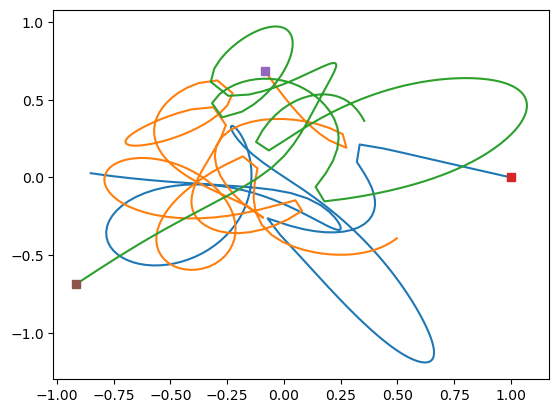

In [7]:
k = np.random.randint(idx.shape[0])  # Pick a random trajectory index
print(k)
plitdx = range(idx[k],257+idx[k])  # Get the row indices for that trajectory
pltsquare = idx[k]   # Determine the subplot position based on trajectory index
plt.plot(data.x_1[plitdx],data.y_1[plitdx])  # Plot the trajectory of object 1
plt.plot(data.x_2[plitdx],data.y_2[plitdx])  # Plot the trajectory of object 2
plt.plot(data.x_3[plitdx],data.y_3[plitdx])  # Plot the trajectory of object 3

plt.plot(data.x_1[pltsquare],data.y_1[pltsquare],'s')  # Mark the starting point of object 1
plt.plot(data.x_2[pltsquare],data.y_2[pltsquare],'s')  # Mark the starting point of object 2
plt.plot(data.x_3[pltsquare],data.y_3[pltsquare],'s')  # Mark the starting point of object 3

<h2>📝 Task 1 - Setting the Baseline</h2>
<h3>Task 1.1 - Data Preparation and Validation Pipeline</h3>

<h3>🧩 Preprocessing (trajectory id, padding, initial conditions)(Reusable)</h3>

In [8]:
#Creates a unique identifier for each trajectory
#Essential to group lines by trajectory (to exclude collisions and make correct division)
def add_traj_id(df: pd.DataFrame, steps_per_traj: int = 257) -> pd.DataFrame:
    out = df.copy()
    out["traj_id"] = (out["Id"] // steps_per_traj).astype(np.int32)
    return out

#Identifies all the lines that have a colision with True
#Essential for filtering colisions and the trajectories with colisions 
def mark_padding(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    feat_cols = [
        'x_1','y_1','v_x_1','v_y_1',
        'x_2','y_2','v_x_2','v_y_2',
        'x_3','y_3','v_x_3','v_y_3'
    ]
    out["is_padding"] = (out[feat_cols].abs().sum(axis=1) == 0)
    return out

#Identifies the initial position of each trajectorie and puts with x0_* and y0_*
#Essential to use the starting positions as static features.
def add_initial_positions(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    first = out.loc[out.groupby("traj_id")["t"].idxmin(),
                    ["traj_id","x_1","y_1","x_2","y_2","x_3","y_3"]].rename(columns={
        "x_1":"x0_1","y_1":"y0_1",
        "x_2":"x0_2","y_2":"y0_2",
        "x_3":"x0_3","y_3":"y0_3"
    })
    out = out.merge(first, on="traj_id", how="left")
    return out

#Pipeline
def preprocess_train(df: pd.DataFrame, steps_per_traj: int = 257) -> pd.DataFrame:
    out = add_traj_id(df, steps_per_traj=steps_per_traj)
    out = mark_padding(out)
    out = add_initial_positions(out)
    return out

<h3>Exploration + grafic Functions (insightful)</h3>

In [9]:
#Dataset visualization
#Important for exploring and documenting the database
def dataset_overview(df):
    n_rows, n_cols = df.shape
    n_traj = df["traj_id"].nunique()
    steps_per_traj = df.groupby("traj_id")["t"].size()
    padding_pct = 100 * df["is_padding"].mean()

    info = pd.DataFrame({
        "metric": [
            "rows", "cols",
            "n_trajectories",
            "steps_per_traj (min)",
            "steps_per_traj (max)",
            "steps_per_traj (mean)",
            "% padding rows",
            "t range [min,max]"
        ],
        "value": [
            n_rows, n_cols,
            n_traj,
            steps_per_traj.min(),
            steps_per_traj.max(),
            f"{steps_per_traj.mean():.2f}",
            f"{padding_pct:.2f}%",
            f"[{df['t'].min()}, {df['t'].max()}]"
        ]
    })
    return info

#Finds the trajectories that were classified has True in padding
#Important for insight into dynamics and collisions.
def find_collision_traj(df):
    has_pad = df.groupby("traj_id")["is_padding"].any()
    cand = has_pad[has_pad].index
    return int(np.random.choice(cand)) if len(cand) > 0 else None

#Histogram of non_paddings trajectories 
def plot_hist_nonpadding_lengths(df):
    g = df.groupby("traj_id")
    lengths = (g["is_padding"].apply(lambda s: (~s).sum())).values
    plt.figure(figsize=(6,4))
    plt.hist(lengths, bins=30)
    plt.xlabel("Non-padding length per trajectory")
    plt.ylabel("Count")
    plt.title("Distribution of effective trajectory lengths")
    plt.show()
 
#Histogram os a random trajectory
def plot_one_trajectory(df, traj_id=None, title_prefix="Trajectory"):
    if traj_id is None:
        traj_id = np.random.choice(df["traj_id"].unique())

    d = df.loc[df["traj_id"] == traj_id].sort_values("t")
    plt.figure(figsize=(6,6))
    plt.plot(d["x_1"], d["y_1"], label="obj 1")
    plt.plot(d["x_2"], d["y_2"], label="obj 2")
    plt.plot(d["x_3"], d["y_3"], label="obj 3")
    plt.plot(d["x_1"].iloc[0], d["y_1"].iloc[0], 's')
    plt.plot(d["x_2"].iloc[0], d["y_2"].iloc[0], 's')
    plt.plot(d["x_3"].iloc[0], d["y_3"].iloc[0], 's')
    plt.axis('equal'); plt.legend()
    plt.title(f"{title_prefix} {traj_id}")
    plt.show()

#Checks if all particles start with velocity 0
#Important for hecking the physical consistency of the dataset
def check_initial_velocities_zero(df):
    d0 = df.loc[df.groupby("traj_id")["t"].idxmin(),
                ["traj_id","v_x_1","v_y_1","v_x_2","v_y_2","v_x_3","v_y_3"]]
    tol = 1e-6
    is_zero = (d0.abs() < tol).all(axis=1)
    summary = pd.DataFrame({
        "trajectories_checked": [len(d0)],
        "all_initial_velocities_zero?": [bool(is_zero.all())],
        "max_abs_initial_speed": [float(d0.abs().values.max())]
    })
    return summary

#Plots 
def plot_t_hist(df):
    plt.figure(figsize=(6,4))
    plt.hist(df["t"], bins=50)
    plt.xlabel("t")
    plt.ylabel("count")
    plt.title("Histogram of timestep t")
    plt.show()


<h3>Exploration + Preparation Execution ( with print for slides)</h3>

,metric,value
0,rows,1285000
1,cols,22
2,n_trajectories,5000
3,steps_per_traj (min),257
4,steps_per_traj (max),257
5,steps_per_traj (mean),257.00
6,% padding rows,15.19%
7,"t range [min,max]","[0.0, 10.0]"


,trajectories_checked,all_initial_velocities_zero?,max_abs_initial_speed
0,5000,False,4999.0


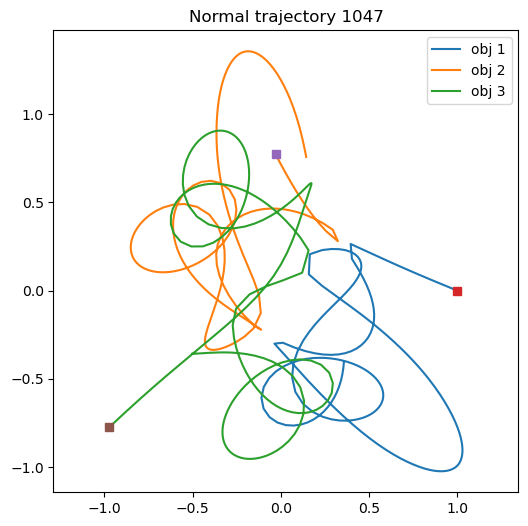

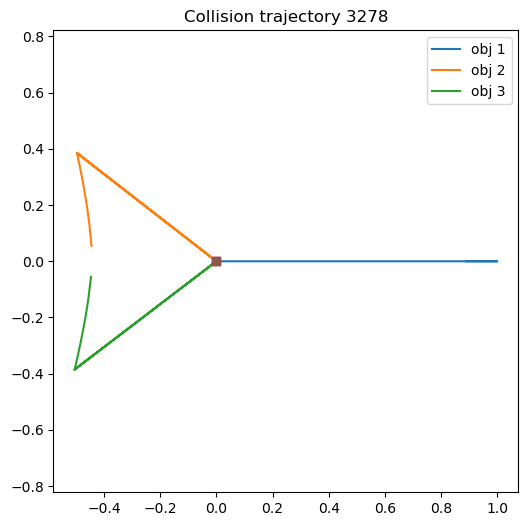

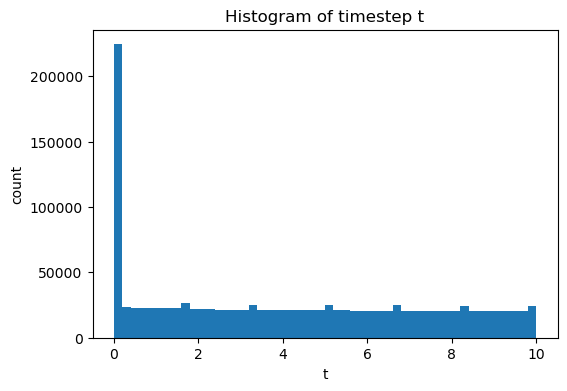

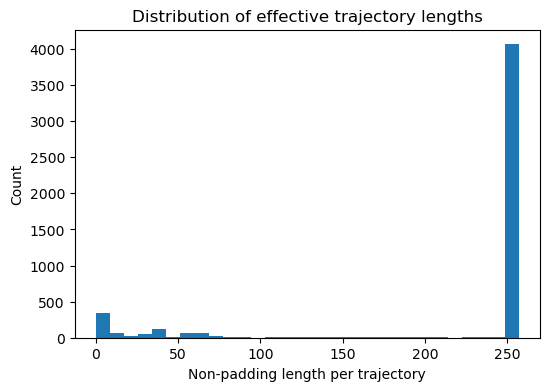

In [10]:
#Show the results
train = preprocess_train(data, steps_per_traj=257)
overview = dataset_overview(train)
display(overview)
init_vel_check = check_initial_velocities_zero(train)
display(init_vel_check)
plot_one_trajectory(train, traj_id=None, title_prefix="Normal trajectory")
col_traj = find_collision_traj(train)
if col_traj is not None:
    plot_one_trajectory(train, traj_id=col_traj, title_prefix="Collision trajectory")
else:
    print("No collision trajectories found (no padding).")

plot_t_hist(train)
plot_hist_nonpadding_lengths(train)


<h3>✂️ Custom Split by Trajectory</h3>

In [11]:
####Splitting the data

#Definition of features and targets
FEATURES = ["t","x0_1","y0_1","x0_2","y0_2","x0_3","y0_3"]
TARGETS  = ["x_1","y_1","x_2","y_2","x_3","y_3"]

#Defining split function in 70% train, 15% test and 15%validation
def make_train_val_test_split(
    dataset: pd.DataFrame,
    features: list = FEATURES,
    targets: list  = TARGETS,
    train_size: float = 0.7,
    val_size: float = 0.15,
    test_size: float = 0.15,
    random_state: int = 42
):
    #Making sure that the sum of the fractions is 1
    assert abs(train_size + val_size + test_size - 1.0) < 1e-8, "Sum of fractions is 1"
    
    #Removing all the lines with padding 
    traj_with_padding = dataset.loc[dataset["is_padding"], "traj_id"].unique()
    dataset = dataset[~dataset["traj_id"].isin(traj_with_padding)].copy()
    
    #Removing colisions
    collision_mask = (dataset["t"] == 0) & \
                     (dataset[["x_1","y_1","x_2","y_2","x_3","y_3"]] == 0).all(axis=1)
    dataset = dataset[~collision_mask]
    print("Total of lines with padding and colisions:", dataset.shape[0])
    
    #Making sure that the trajectories are unique 
    unique_traj = np.array(dataset["traj_id"].unique())
    np.random.seed(random_state)
    np.random.shuffle(unique_traj)

    n_total = len(unique_traj)
    n_train = int(train_size * n_total)
    n_val   = int(val_size * n_total)
    n_test = n_total - n_train - n_val

    tr_ids = unique_traj[:n_train]
    va_ids = unique_traj[n_train:n_train+n_val]
    te_ids = unique_traj[n_train+n_val:]
    
    #Filtering dataset per split
    tr = dataset[dataset["traj_id"].isin(tr_ids)].copy()
    va = dataset[dataset["traj_id"].isin(va_ids)].copy()
    te = dataset[dataset["traj_id"].isin(te_ids)].copy()
    
    #Extracting X and Y arrays
    X_tr, y_tr = tr[features].values, tr[targets].values
    X_va, y_va = va[features].values, va[targets].values
    X_te, y_te = te[features].values, te[targets].values

    return X_tr, y_tr, X_va, y_va, X_te, y_te, tr, va, te

#Executing split
X_tr, y_tr, X_va, y_va, X_te, y_te, tr_df, va_df, te_df = make_train_val_test_split(train)

print("Train:", X_tr.shape, y_tr.shape)
print("Val:  ", X_va.shape, y_va.shape)
print("Test: ", X_te.shape, y_te.shape)

Total of lines with padding and colisions: 1041621
Train: (729109, 7) (729109, 6)
Val:   (155999, 7) (155999, 6)
Test:  (156513, 7) (156513, 6)


<h3>📝 Task 1.2 - Learn the baseline model</h3>

<h3>🔎 Baseline Model (Linear Regression)</h3>

In [12]:
############# Task1.2 #############

#Pipeline: StandardScaler for normalizing the values and doing the linear regression
baseline = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
baseline.fit(X_tr, y_tr)  
y_hat = baseline.predict(X_va)  # previsão no validation

#Doing the mean squared error
rmse = mean_squared_error(y_va, y_hat)
rmse = np.sqrt(mean_squared_error(y_va, y_hat))
print("Baseline RMSE (validation split):", rmse)

Baseline RMSE (validation split): 1.4159063657148816


<h3>📊 y–ŷ Plot Helper</h3>

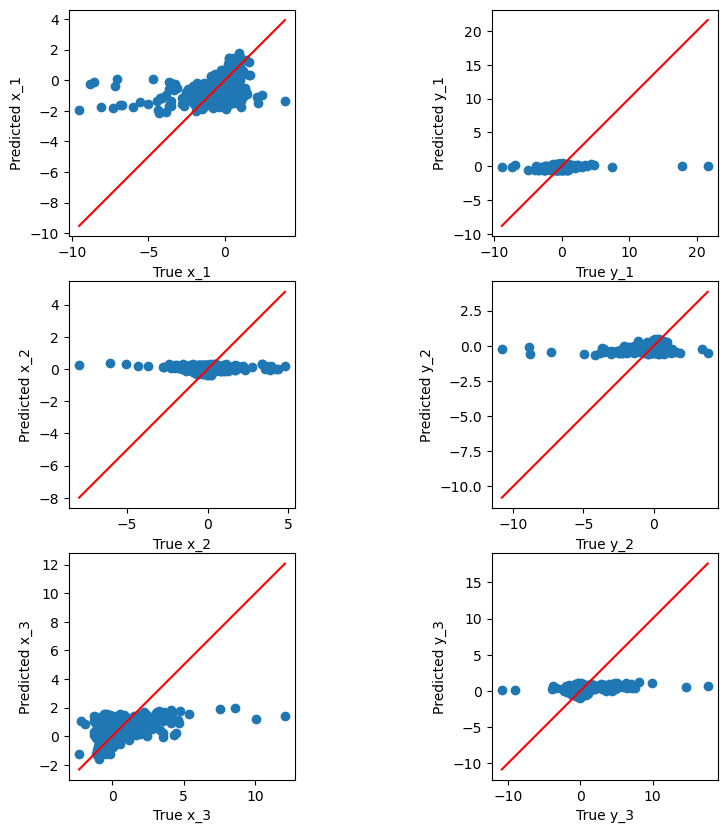

In [13]:
def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()
    

plot_y_yhat(y_va, y_hat, plot_title="baseline_validation")


<h3>📤 Generate Kaggle Submission</h3>

In [14]:
#Preparing the dataset for training
full = train[~train["is_padding"]].copy()
X_full = full[FEATURES].values
y_full = full[TARGETS].values

#Baseline model
baseline_full = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
baseline_full.fit(X_full, y_full)

#Preparing test
X_test = test[["t","x0_1","y0_1","x0_2","y0_2","x0_3","y0_3"]].values
pred = baseline_full.predict(X_test)

#Construct the submission
submission = pd.DataFrame({
    "Id": test["Id"].astype(np.int64),
    "x_1": pred[:,0], "y_1": pred[:,1],
    "x_2": pred[:,2], "y_2": pred[:,3],
    "x_3": pred[:,4], "y_3": pred[:,5],
})
submission.to_csv("baseline-model.csv", index=False)
print("Saved submission file: baseline-model.csv") 




Saved submission file: baseline-model.csv


<h3>📝 Task 2 -  Nonlinear models on the data — the Polynomial model</h3>

<h3>📝 Task 2.1 - Development</h3>

<h3> 🚀 Development — Polynomial Regression Validition</h3>

In [15]:
def pick_regressor(use_ridge=False, ridge_alphas=(0.01, 0.1, 1.0, 10.0, 100.0)):
    #Devolve o regressor a usar no fim do pipeline.
    return RidgeCV(alphas=np.array(ridge_alphas)) if use_ridge else LinearRegression()


def validate_polynomial(
    X_train, y_train, X_val, y_val,
    degrees=range(1, 8),        # testar graus 1..7 
    max_features=1500,          # não deixar explodir nº de colunas
    sample_frac=0.03,           # usar uma fração do treino para acelerar
    random_state=42,
    use_ridge=False,
    ridge_alphas=(0.01, 0.1, 1.0, 10.0, 100.0),
    verbose=True
):
    
    #Testa vários graus de PolynomialFeatures e escolhe o que dá menor RMSE na validação.
   #- Faz amostragem do treino (sample_frac) para ser rápido.
    #- Antes de treinar, verifica quantas features o grau vai gerar; se passar 'max_features', salta.
    #- Devolve: (best_model, best_rmse, logs) onde logs = [(grau, n_features, tempo, rmse), ...].
    
    rng = np.random.RandomState(random_state)

    # 1) Amostragem controlada do treino
    n = len(X_train)
    k = max(1, int(round(sample_frac * n)))
    idx = rng.choice(n, k, replace=False)
    X_sub = X_train[idx].astype(np.float32, copy=False)
    y_sub = y_train[idx].astype(np.float32, copy=False)

    Xv = X_val.astype(np.float32, copy=False)
    yv = y_val.astype(np.float32, copy=False)

    best_rmse = np.inf
    best_model = None
    logs = []
    n_in = X_sub.shape[1]

    for d in degrees:
        # 2) Ver quantas features o grau d vai gerar (sem treinar)
        probe = PolynomialFeatures(degree=d, include_bias=False)
        probe.fit(np.zeros((1, n_in), dtype=np.float32))
        n_feats = int(probe.n_output_features_)

        if max_features is not None and n_feats > max_features:
            if verbose:
                print(f"[skip] grau {d} → {n_feats} features (limite {max_features})")
            logs.append((d, n_feats, np.nan, np.nan))
            continue

        # 3) Construir pipeline e treinar
        model = pick_regressor(use_ridge=use_ridge, ridge_alphas=ridge_alphas)
        pipe = make_pipeline(
            PolynomialFeatures(degree=d, include_bias=False),
            StandardScaler(with_mean=True),
            model
        )

        t0 = time.time()
        pipe.fit(X_sub, y_sub)
        fit_time = time.time() - t0

        # 4) Validar
        pred = pipe.predict(Xv)
        rmse = float(np.sqrt(mean_squared_error(yv, pred)))

        logs.append((d, n_feats, fit_time, rmse))
        if verbose:
            print(f"degree={d:>2} | feats={n_feats:>5} | time={fit_time:6.2f}s | RMSE={rmse:7.4f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = pipe

    return best_model, best_rmse, logs


<h3>Run a simple validation (a “trial”)</h3>

In [16]:
# parâmetros práticos
DEGREES     = range(1, 8)
MAX_FEATURES= 1500
SAMPLE_FRAC = 0.03

print(" Linear Regression")
best_lin, rmse_lin, logs_lin = validate_polynomial(
    X_tr, y_tr, X_va, y_va,
    degrees=DEGREES,
    max_features=MAX_FEATURES,
    sample_frac=SAMPLE_FRAC,
    random_state=42,
    use_ridge=False,
    verbose=True
)
print(" Best RMSE (Linear):", rmse_lin, "\n")

print(" RidgeCV (L2 regularization)")
best_ridge, rmse_ridge, logs_ridge = validate_polynomial(
    X_tr, y_tr, X_va, y_va,
    degrees=DEGREES,
    max_features=MAX_FEATURES,
    sample_frac=SAMPLE_FRAC,
    random_state=42,
    use_ridge=True,
    ridge_alphas=(0.01, 0.1, 1.0, 10.0, 100.0),
    verbose=True
)
print(" Best RMSE (RidgeCV):", rmse_ridge)


 Linear Regression
degree= 1 | feats=    7 | time=  0.01s | RMSE= 1.4162
degree= 2 | feats=   35 | time=  0.02s | RMSE= 1.3778
degree= 3 | feats=  119 | time=  0.05s | RMSE= 1.3336
degree= 4 | feats=  329 | time=  0.13s | RMSE= 1.2997
degree= 5 | feats=  791 | time=  0.38s | RMSE= 1.2929
[skip] grau 6 → 1715 features (limite 1500)
[skip] grau 7 → 3431 features (limite 1500)
 Best RMSE (Linear): 1.2929166109111911 

 RidgeCV (L2 regularization)
degree= 1 | feats=    7 | time=  0.02s | RMSE= 1.4162
degree= 2 | feats=   35 | time=  0.04s | RMSE= 1.3779
degree= 3 | feats=  119 | time=  0.14s | RMSE= 1.3336
degree= 4 | feats=  329 | time=  0.41s | RMSE= 1.2975
degree= 5 | feats=  791 | time=  1.21s | RMSE= 1.2638
[skip] grau 6 → 1715 features (limite 1500)
[skip] grau 7 → 3431 features (limite 1500)
 Best RMSE (RidgeCV): 1.2637504701353894


<h3>Save number of features and times for slides</h3>

In [17]:
def logs_to_df(logs):
    return pd.DataFrame(logs, columns=["degree","n_features","fit_time_s","rmse_val"])

df_lin   = logs_to_df(logs_lin)
df_ridge = logs_to_df(logs_ridge)

print("Linear summary:\n", df_lin)
print("\nRidgeCV summary:\n", df_ridge)



Linear summary:
    degree  n_features  fit_time_s  rmse_val
0       1           7    0.013512  1.416203
1       2          35    0.019767  1.377825
2       3         119    0.051598  1.333596
3       4         329    0.126018  1.299668
4       5         791    0.381591  1.292917
5       6        1715         NaN       NaN
6       7        3431         NaN       NaN

RidgeCV summary:
    degree  n_features  fit_time_s  rmse_val
0       1           7    0.018064  1.416246
1       2          35    0.042684  1.377876
2       3         119    0.142983  1.333636
3       4         329    0.408597  1.297471
4       5         791    1.208023  1.263750
5       6        1715         NaN       NaN
6       7        3431         NaN       NaN


<h3>Repeat 10 times and plot the best grade distribution</h3>

Best degrees across 10 runs: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


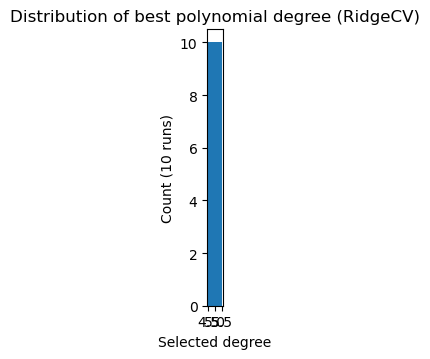

✅ Final chosen degree: 5


In [18]:
best_degrees = []
for seed in range(1, 11):
    mdl, rmse, logs = validate_polynomial(
        X_tr, y_tr, X_va, y_va,
        degrees=DEGREES,
        max_features=MAX_FEATURES,
        sample_frac=0.05,      # um pouco mais para dar estabilidade
        random_state=seed,
        use_ridge=True,
        ridge_alphas=(0.01, 0.1, 1.0, 10.0, 100.0),
        verbose=False
    )
    df = logs_to_df(logs).dropna(subset=["rmse_val"])
    best_deg = int(df.loc[df["rmse_val"].idxmin(), "degree"])
    best_degrees.append(best_deg)

print("Best degrees across 10 runs:", best_degrees)

plt.figure(figsize=(1,3.7))
plt.hist(best_degrees, bins=np.arange(min(best_degrees)-0.5, max(best_degrees)+1.5, 1))
plt.xlabel("Selected degree"); plt.ylabel("Count (10 runs)")
plt.title("Distribution of best polynomial degree (RidgeCV)")
plt.tight_layout(); plt.show()

# escolher o grau final (moda)
from collections import Counter
final_degree = Counter(best_degrees).most_common(1)[0][0]
print("✅ Final chosen degree:", final_degree)


<h3>📝 Task 2.2 - compare with baseline and submit</h3>

<h3>📊 Compare RMSE + y–ŷ plots</h3>

Chosen model: Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])))])
Polynomial RMSE (validation): 1.26375059574697


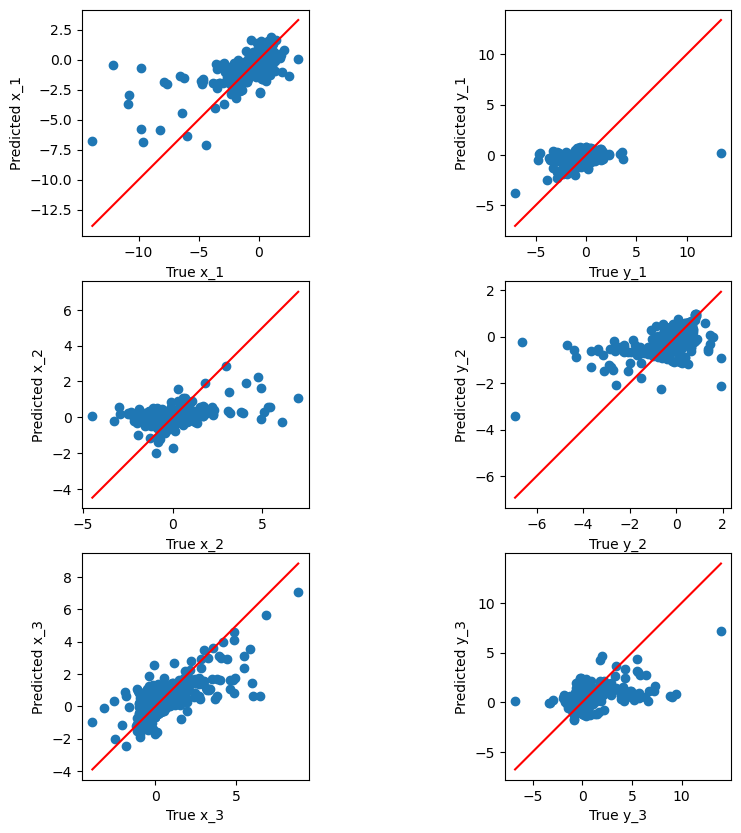

In [19]:
# entre Linear e Ridge, fica o melhor
chosen_model = best_ridge if rmse_ridge <= rmse_lin else best_lin
print("Chosen model:", chosen_model)

y_va_pred = chosen_model.predict(X_va)
rmse_poly = float(np.sqrt(mean_squared_error(y_va, y_va_pred)))
print("Polynomial RMSE (validation):", rmse_poly)

# gráfico y–ŷ (mesma função que já usaste na Task 1)
_ = plot_y_yhat(y_va, y_va_pred, plot_title="poly_validation")


<h3>📄 Train on the full dataset (without padding) and submit to Kaggle</h3>

In [20]:
# treinar no máximo de dados possível (sem padding)
full = train[~train["is_padding"]].copy()
X_full = full[FEATURES].values
y_full = full[TARGETS].values

# reconstruir pipeline com o GRAU final e o tipo de regressor escolhido
is_ridge = isinstance(chosen_model.named_steps[list(chosen_model.named_steps.keys())[-1]], RidgeCV)
reg_final = pick_regressor(use_ridge=is_ridge, ridge_alphas=(0.01, 0.1, 1.0, 10.0, 100.0))

final_model = make_pipeline(
    PolynomialFeatures(degree=int(final_degree), include_bias=False),
    StandardScaler(with_mean=True),
    reg_final
)
final_model.fit(X_full, y_full)

# prever no test
X_test_arr = test[["t","x0_1","y0_1","x0_2","y0_2","x0_3","y0_3"]].values
pred = final_model.predict(X_test_arr)

# salvar submissão
polysub = pd.DataFrame({
    "Id": test["Id"].astype(np.int64),
    "x_1": pred[:,0], "y_1": pred[:,1],
    "x_2": pred[:,2], "y_2": pred[:,3],
    "x_3": pred[:,4], "y_3": pred[:,5],
})
polysub.to_csv("polynomial_submission.csv", index=False)
print(f"Saved: polynomial_submission.csv (degree={final_degree}, ridge={is_ridge})")


Saved: polynomial_submission.csv (degree=5, ridge=True)
